### 2a

From my notes:

https://github.com/NoLtour/Uni-notes/blob/main/(Year%203)%20Aero%20systems%20control/3%20Transfer%20functions%20and%20block%20diagrams/transfer%20function%20variable%20names.md


 
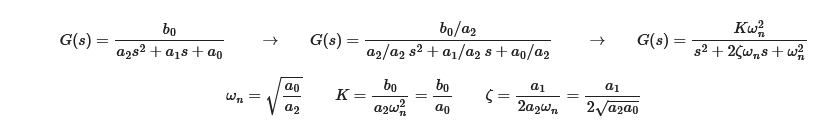


In [22]:
import sympy as sp 
sp.init_printing()

a_2 = 1
a_1 = 10
a_0 = 400
b_0 = 300

omega_n = sp.sqrt( a_0/a_2 )
K = b_0/a_0
zeta =   a_1/(2*sp.sqrt( a_0*a_2 ))

print( "natural freq:", omega_n.evalf() )
print( "system gain:",K)
print( "daming factor:", zeta.evalf()  )


natural freq: 20.0000000000000
system gain: 0.75
daming factor: 0.250000000000000


### 2b

In [23]:

print( "daming factor:", zeta.evalf()  )

daming factor: 0.250000000000000


### 2c,d,e (Theory)

Taken from my obsidian notes:

[https://github.com/NoLtour/Uni-notes/blob/main/(Year%203)%20Aero%20systems%20control/4%20Response%20of%20dynamic%20systems/dynamic%20system%20response%20time%20metrics.md](https://github.com/NoLtour/Uni-notes/blob/main/(Year%203)%20Aero%20systems%20control/4%20Response%20of%20dynamic%20systems/dynamic%20system%20response%20time%20metrics.md)

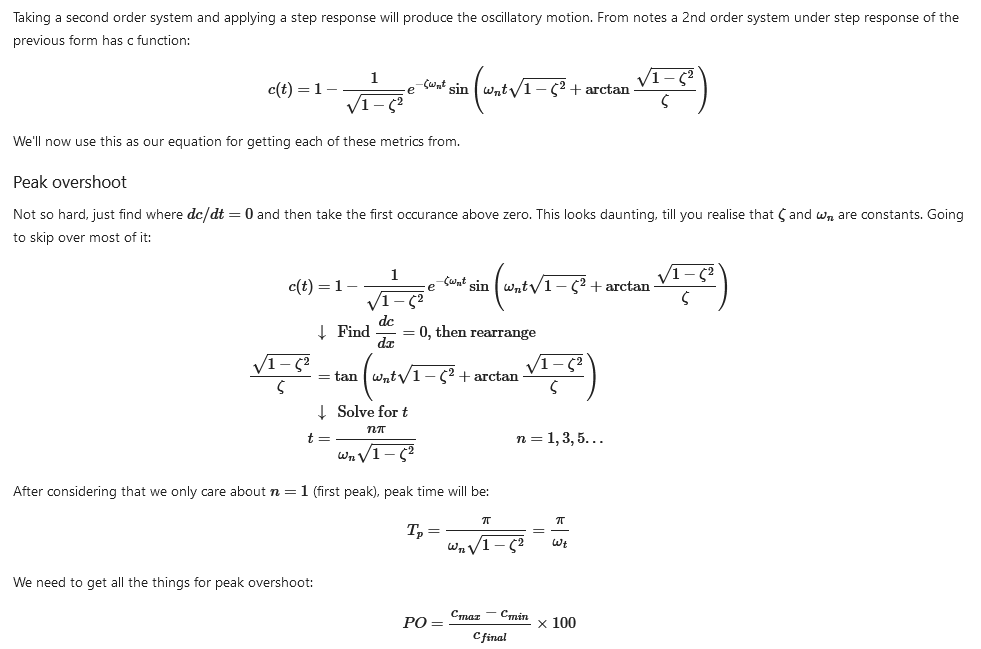
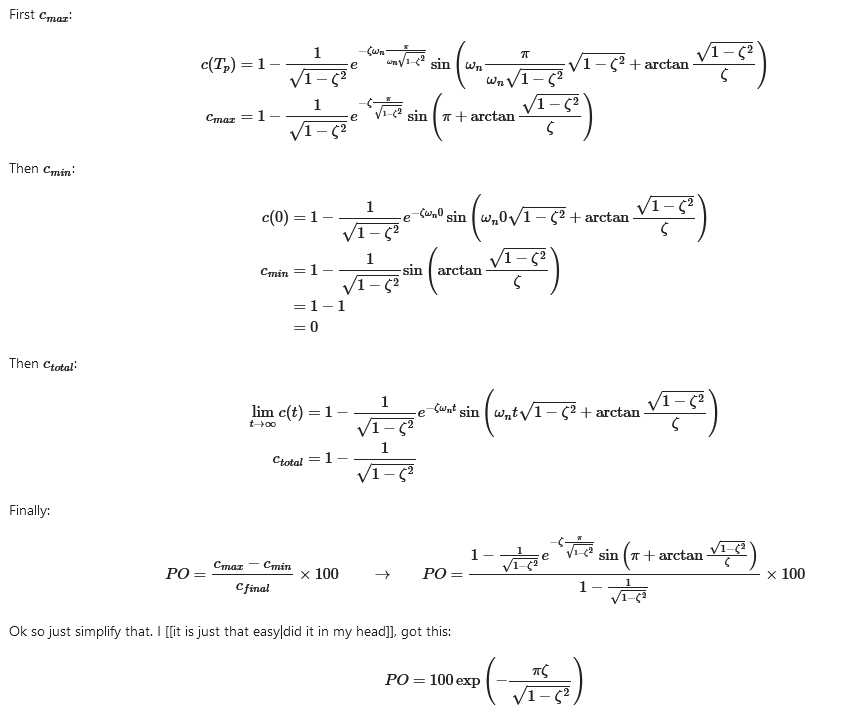

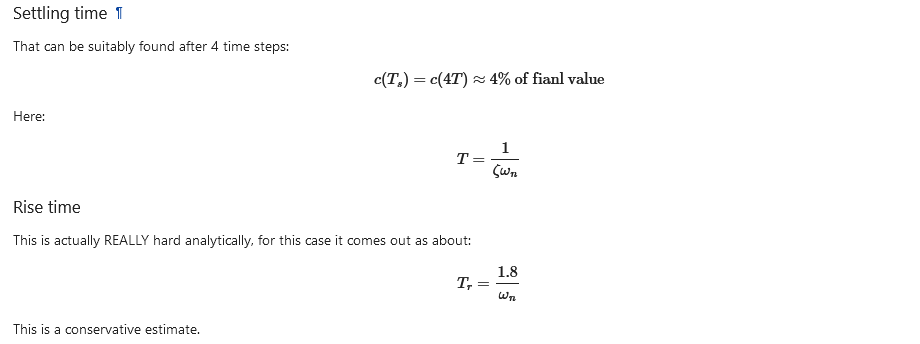


#### 2c

In [24]:
unitTime = 1/(zeta*omega_n)

settlingTime = unitTime*4

print( "settlingTime:", settlingTime, "=", settlingTime.evalf() )

settlingTime: 0.800000000000000 = 0.800000000000000


#### 2d overshoot

In [31]:
e = sp.E
pi = sp.pi

c_max = K - (K/sp.sqrt(1 - zeta**2))*e**(-zeta * pi/(sp.sqrt(1 - zeta**2))) * sp.sin( pi + sp.atan( sp.sqrt(1 - zeta**2)/zeta ) )

sp.E**2

print( "peak overshoot value =",c_max,"=",c_max.evalf() )

peakOvershoot = 100 * e**( - pi*zeta/(sp.sqrt(1 - zeta**2)) )

print( "peak overshoot =",peakOvershoot.evalf(),"%" )

peak overshoot value = 0.75*exp(-sqrt(15)*pi/15) + 0.75 = 1.08325816881637
peak overshoot = 44.4344225088489 %


#### 2e peak time

In [26]:
peakTime = pi/(omega_n * sp.sqrt(1 - zeta**2))

print( "peak time=", peakTime ,"=", peakTime.evalf() )

peak time= 0.0133333333333333*sqrt(15)*pi = 0.162231147038944


### 2f plot 

2.718281828459045


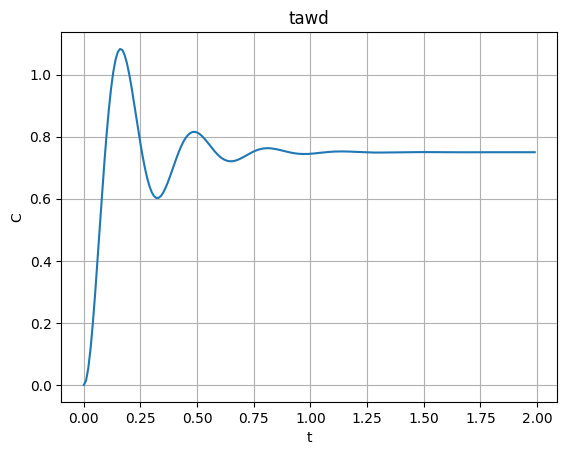

In [32]:
import matplotlib.pyplot as plot 
import numpy as np


Ts = [i * 0.01 for i in range(int(2 / 0.01))]
e = np.e

Cs = []
for t in Ts:
    Cs.append((K - ((K/sp.sqrt( 1 - zeta*zeta ))) * e**( - zeta*omega_n*t ) * sp.sin( omega_n*t*sp.sqrt(1 - zeta**2) + sp.atan( sp.sqrt(1-zeta**2)/zeta ) ) ).evalf())

print(e)

plot.figure(87443452)
plot.grid()

plot.title("tawd" ) 
plot.ylabel( "C" )
plot.xlabel( "t" ) 
plot.plot( Ts, Cs )

plot.show()

#### 2g pole sketch



pole1 = -5 - 5*sqrt(15)*I
pole2 = -5 + 5*sqrt(15)*I
phi= -pi + atan(sqrt(15)) = -1.82347658193698 rad


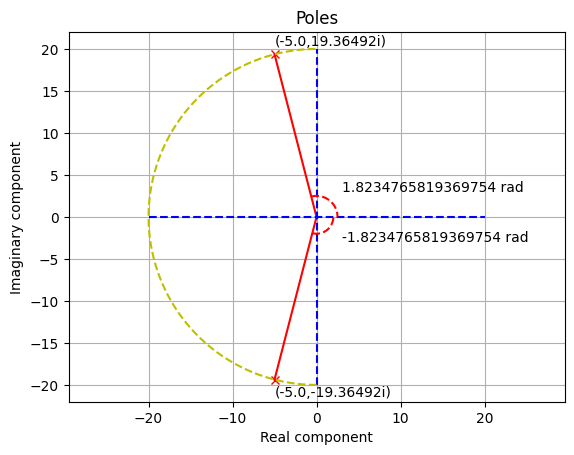

In [117]:

# Solve poles by treating 

x = sp.symbols("x")

pole1, pole2 = sp.solve( (x**2)*a_2 + x*a_1 +  a_0 )

print("pole1 =", pole1)
print("pole2 =", pole2)

p1_real, p1_imag = pole1.as_real_imag()
p2_real, p2_imag = pole2.as_real_imag()

phi = sp.atan2( p1_imag, p1_real )
print("phi=",phi, "=", phi.evalf() ,"rad")

plot.figure(872443452)
plot.grid()

plot.title("Poles" ) 
plot.ylabel( "Imaginary component" )
plot.xlabel( "Real component" ) 
plot.plot( [p1_real,p2_real], [p1_imag,p2_imag], "xr" )
plot.plot( [p1_real,0,p2_real], [p1_imag,0,p2_imag], "-r" )
plot.plot( [-omega_n,omega_n], [0,0], "--b" )
plot.plot( [0,0],[-omega_n,omega_n],  "--b" )
plot.axis("equal")

angs = np.arange( -np.pi/2,np.pi/2, 0.01) 
plot.plot(  -omega_n*np.cos(angs), omega_n*np.sin(angs), "--y" ) 


angs =np.arange( (float(phi.evalf())), 0,  0.01)  
plot.plot(  2*np.cos(angs), 2*np.sin(angs), "--r" ) 
angs =-np.arange( (float(phi.evalf())), 0,  0.01)  
plot.plot(  2.5*np.cos(angs), 2.5*np.sin(angs), "--r" ) 

def strRound(inp):
    return str( np.round(float(inp), 5) )

plot.text(3,3,str(abs(float(phi.evalf())))+" rad")
plot.text(3,-3,str((float(phi.evalf())))+" rad")

plot.text(p1_real,p1_imag-2,"("+strRound(p1_real)+","+strRound(p1_imag)+"i)")
plot.text(p2_real,p2_imag+1,"("+strRound(p2_real)+","+strRound(p2_imag)+"i)")

plot.show()
